## Preprocessing

In [1]:
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
import mglearn

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [2]:
# I had to delete some sort of .DS_store file in order to load the data
import glob, os

for root, dirs, files in os.walk('/Users/loesvanvoorden/JupyterLocal/Research Project/spectrograms/'):
    i = 0
    for file in files:
        if file.endswith('.DS_Store'):
            path = os.path.join(root, file)

            print("Deleting: %s" % (path))

            if os.remove(path):
                print("Unable to delete!")
            else:
                print("Deleted...")
                i += 1

print("Files Deleted: %d" % (i))

Files Deleted: 0


Length of files list: 17406
the name of the spectrogram is XC417425_53.npy, and a snippet of the spectrogram: 
[[-27.049377 -20.491043 -19.678352 ... -26.410507 -20.273582 -27.049377]
 [-22.858936 -19.531048 -18.904804 ... -22.432812 -19.603615 -22.858936]
 [-27.699642 -19.318993 -19.342266 ... -28.354712 -21.040966 -27.699642]
 ...
 [-31.265753 -33.566544 -46.038162 ... -37.998543 -30.450146 -31.265753]
 [-31.288641 -33.59845  -46.34059  ... -38.18842  -30.46617  -31.288641]
 [-31.304691 -33.62623  -46.910583 ... -38.018616 -30.454145 -31.304691]]
the shape of spectrogram 1 = (224, 224)


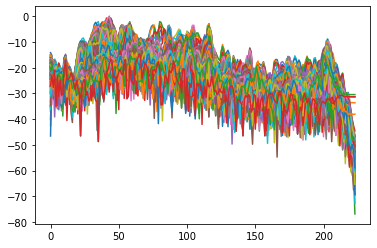

In [3]:
# the path to all spectrograms
path_data_all = os.path.normpath('/Users/loesvanvoorden/JupyterLocal/Research Project/spectrograms/')

# all spectrograms, ordered on species
all_species = os.listdir(path_data_all)
all_species.sort()

all_files = [] # list of all files, in tuple form, sorted by file; (file name, file path, species name, target value of species)
i = 0 # target value per species
for species in all_species:
    species_path = os.path.join(path_data_all, species) 
    species_files = os.listdir(species_path)
    for file in species_files:
        file_path = os.path.join(species_path, file)
        all_files.append((file, file_path, species, i))
    i += 1

print(f"Length of files list: {len(all_files)}")

# example -> loading the first spectrogram
spectrogram1 = np.load(all_files[0][1])
print(f"the name of the spectrogram is {all_files[0][0]}, and a snippet of the spectrogram: \n{spectrogram1}")
print(f"the shape of spectrogram 1 = {spectrogram1.shape}")
plt.figure()
plt.plot(spectrogram1)
plt.show()

In [4]:
# putting all of the spectrograms together into 1 3D array
# don't know whether the shape of this is correct 
# print(len(all_files))
all_specs = np.zeros((len(all_files), 224, 224))
all_targets = np.zeros((len(all_files))) # bird species

for i in range(len(all_files)):
    spec = np.load(all_files[i][1])
    all_specs[i,:224,:224] = spec
    all_targets[i] = all_files[i][3]

# JUST FOR NOW
spec17000 = np.load(all_files[17000][1])
all_specs[17000,:224,:224] = spec17000
all_targets[17000]= all_files[17000][3]

# cropping the spectrograms which will cut off the upper 'unnecessary' part
cropped_specs = all_specs[:, :150, :]
cropped_targets = all_targets

the shape of the array with the cropped spectrograms is: (17406, 150, 224)


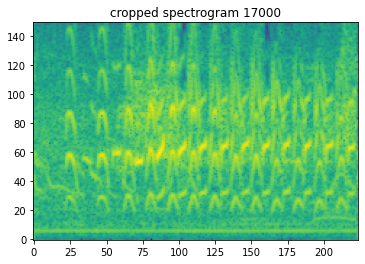

the shape of the array with the uncropped spectrograms is: (17406, 224, 224)


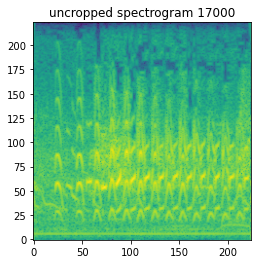

In [5]:
# example with spectrogram number 17,000
print(f"the shape of the array with the cropped spectrograms is: {cropped_specs.shape}")
plt.figure()
plt.imshow(cropped_specs[16999], origin='lower')
plt.title("cropped spectrogram 17000")
plt.show()

print(f"the shape of the array with the uncropped spectrograms is: {all_specs.shape}")
plt.figure()
plt.imshow(all_specs[16999], origin='lower')
plt.title("uncropped spectrogram 17000")
plt.show()

the shape of the array with the cropped spectrograms is: (17406, 150, 224)


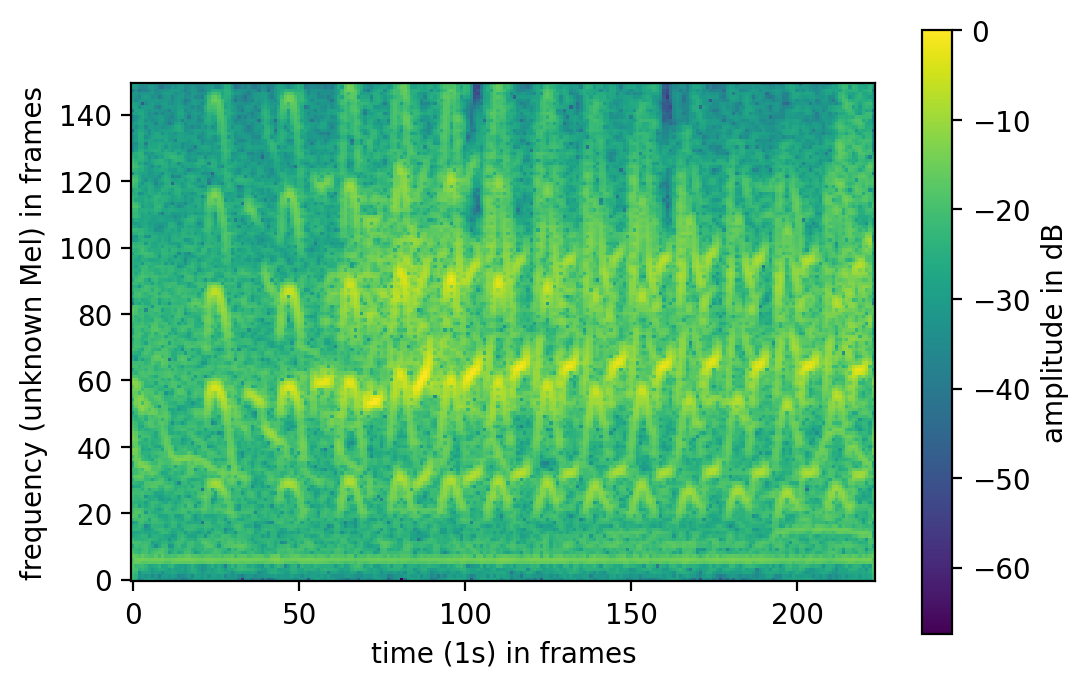

the shape of the array with the uncropped spectrograms is: (17406, 224, 224)


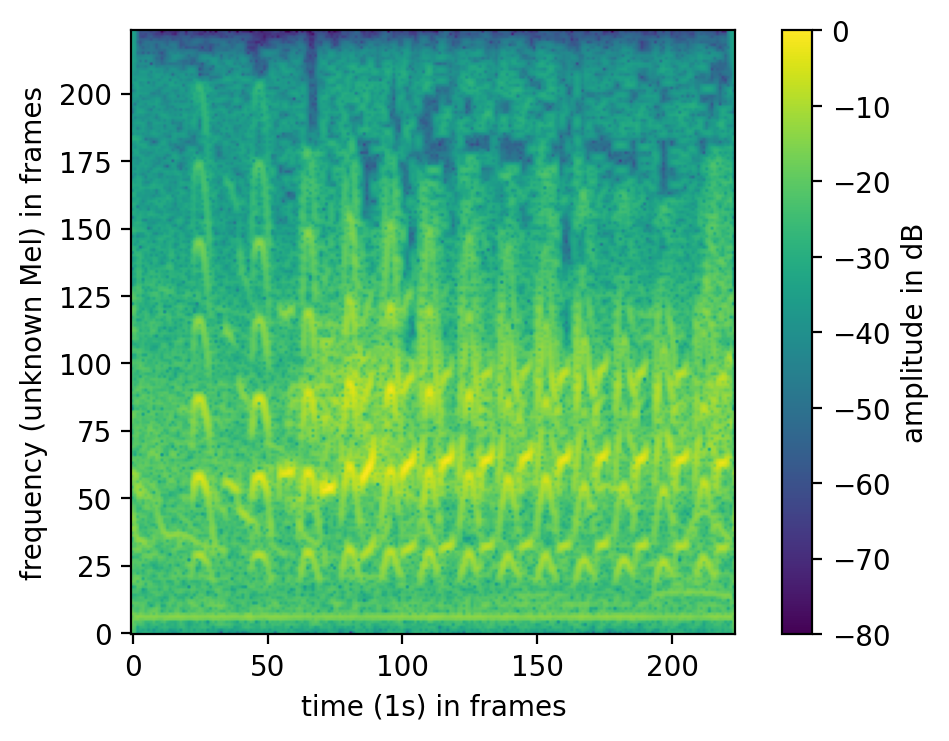

In [6]:
# example with spectrogram number 17,000
print(f"the shape of the array with the cropped spectrograms is: {cropped_specs.shape}")
plt.figure(dpi=200)
plt.imshow(cropped_specs[16999], origin='lower')
plt.xlabel("time (1s) in frames")
plt.ylabel("frequency (unknown Mel) in frames")
color = plt.colorbar()
color.set_label("amplitude in dB", rotation=90)
plt.savefig("cropped_spec.png")
plt.show()
 
print(f"the shape of the array with the uncropped spectrograms is: {all_specs.shape}")
plt.figure(dpi=200)
plt.imshow(all_specs[16999], origin='lower')
plt.xlabel("time (1s) in frames")
plt.ylabel("frequency (unknown Mel) in frames")
color = plt.colorbar()
color.set_label("amplitude in dB", rotation=90)
plt.savefig("uncropped_spec.png")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import utils

# defining the ratios in which the data will be split
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

# determining our X and y
X = cropped_specs
y = cropped_targets

# shuffling data: X and y shuffle in unison so we don't have to worry about X not matching y
X, y = utils.shuffle(X, y)

# reshaping data
X = X.reshape(X.shape[0], -1)
print(X.shape)
y = y.reshape(y.shape[0], -1)


(17406, 33600)


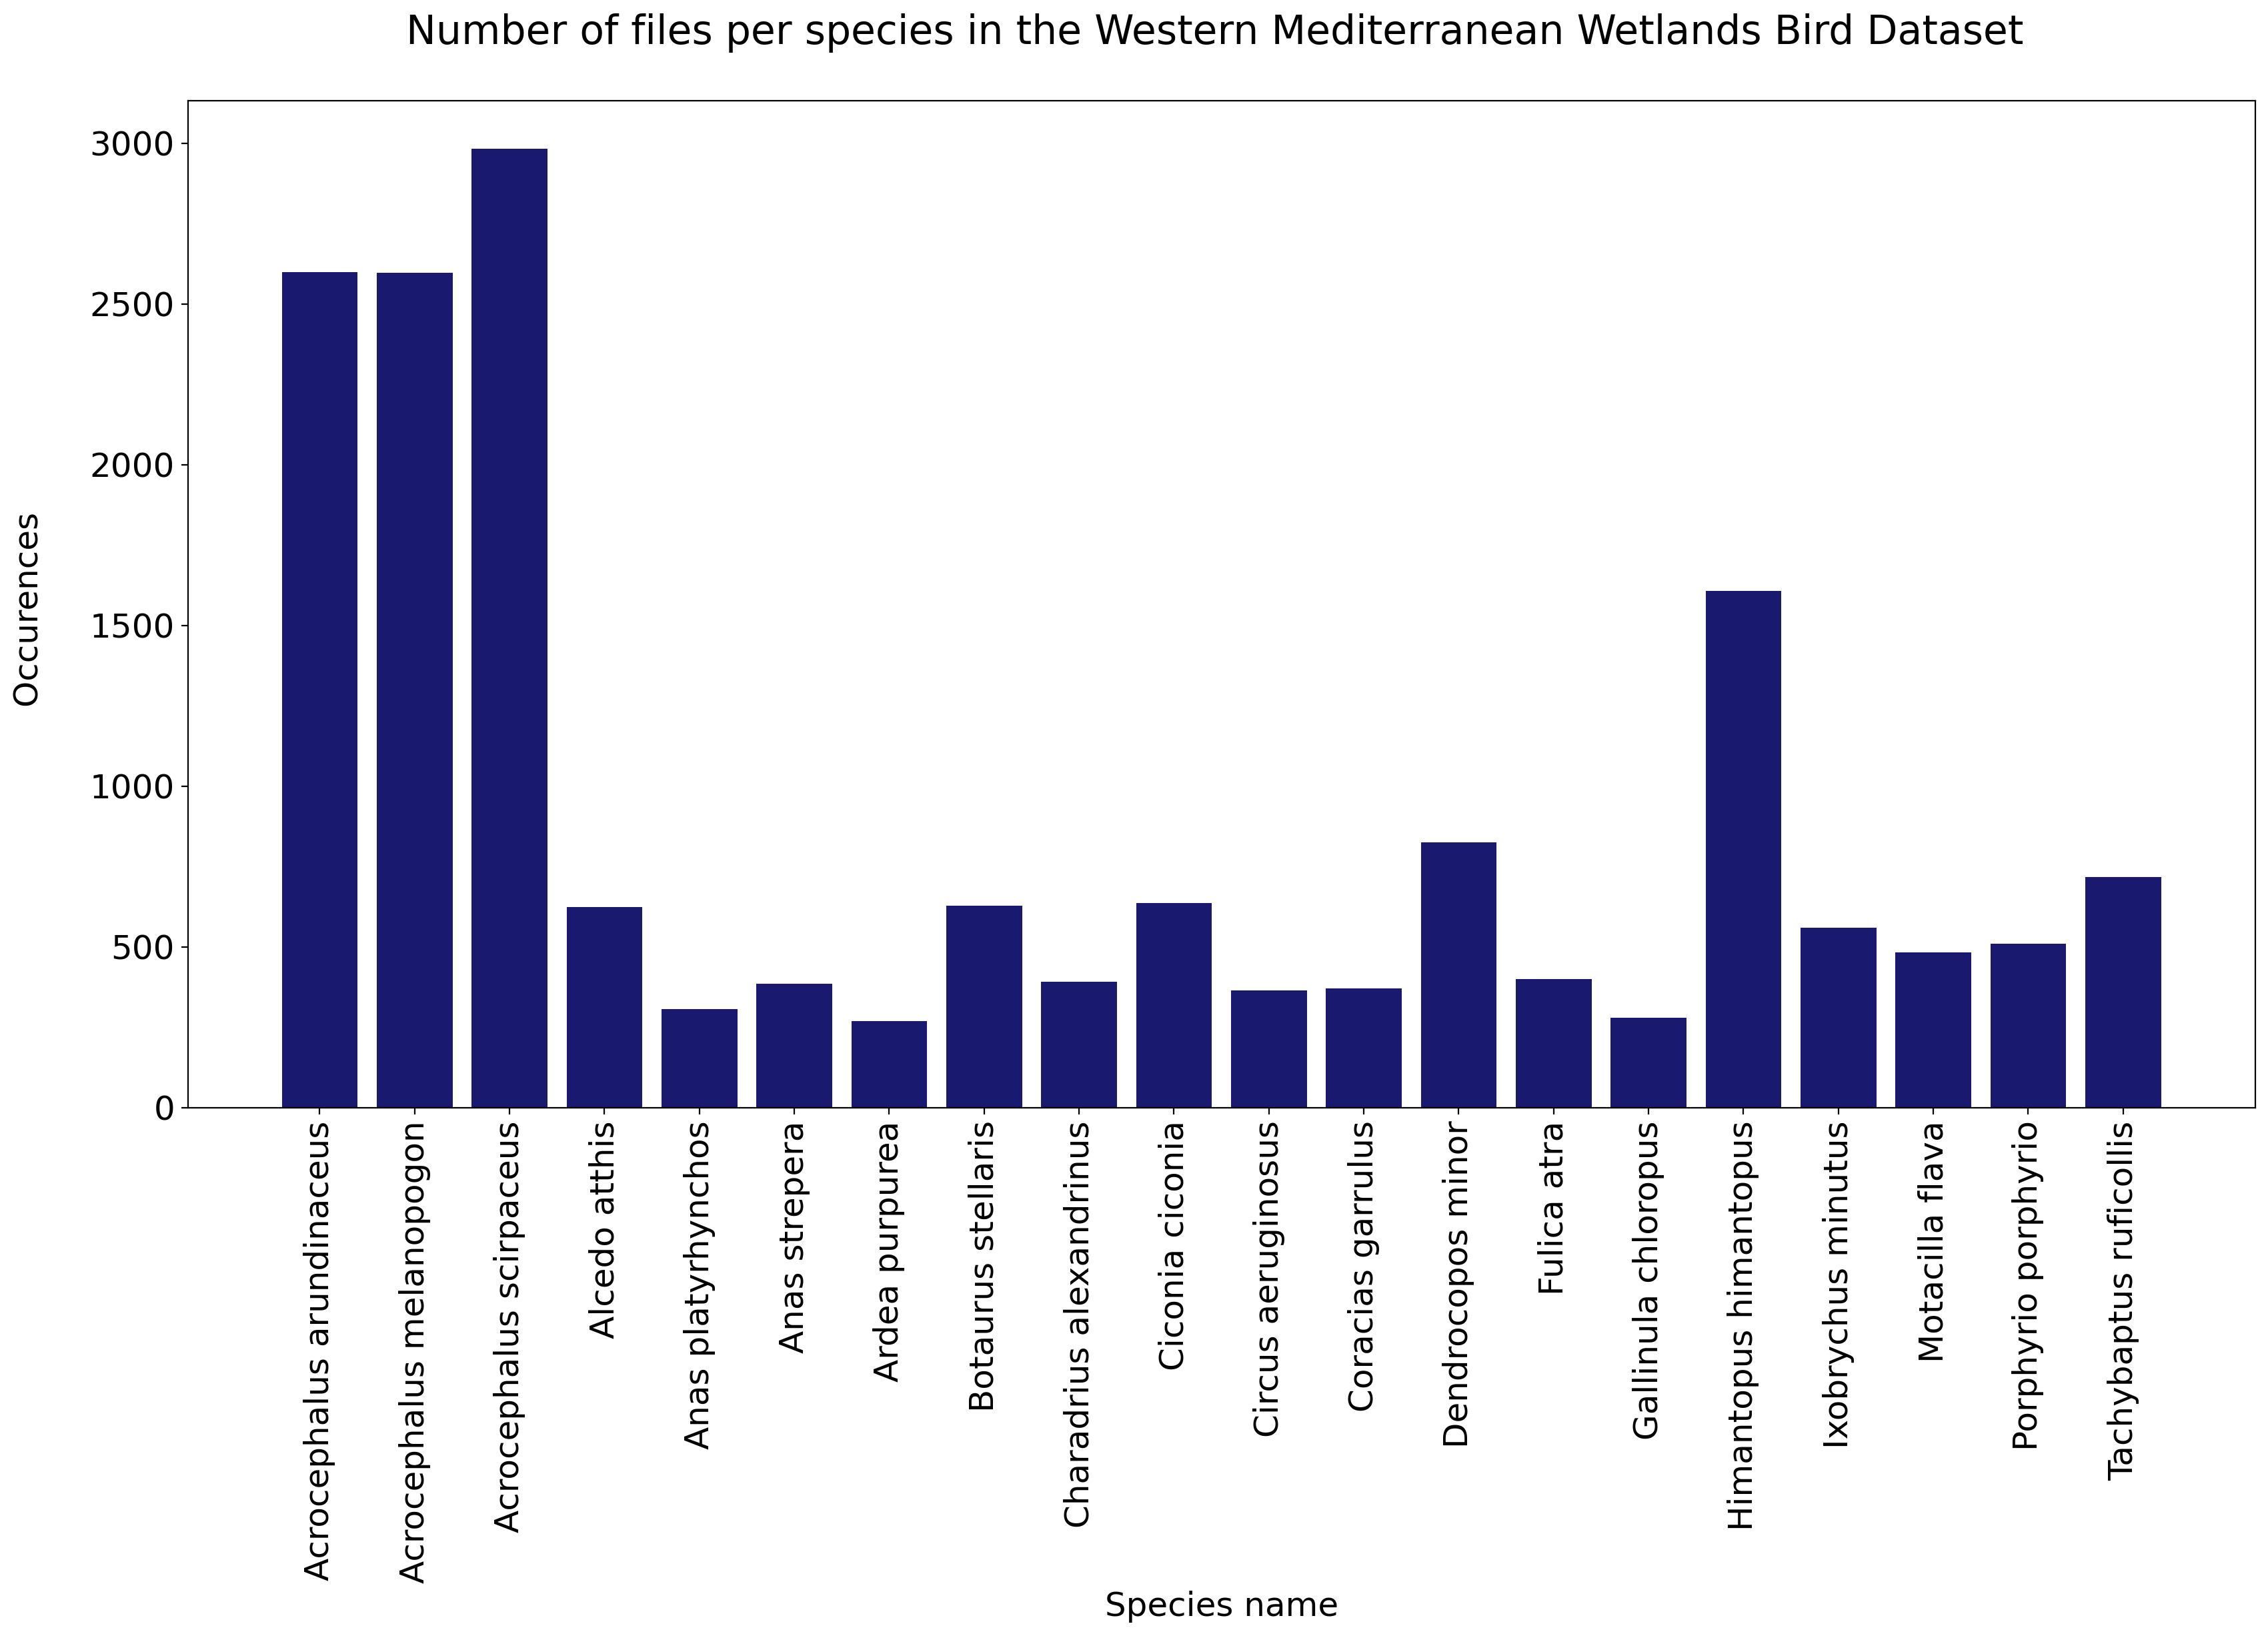

In [8]:
# getting nice bargraph distribution of species

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

data = pd.read_csv("metadata.csv", sep=';')
columns = np.array(list(data.columns))
species = list(data.species)
counts = dict(Counter(species))
#print(counts)
#print(species)

plt.rcParams.update({'font.size': 18}) # we want stuff to be visible
plt.figure(figsize=(20, 10), dpi=200)
plt.title("Number of files per species in the Western Mediterranean Wetlands Bird Dataset \n ")
plt.ylabel("Occurences \n")
plt.xlabel("Species name")
plt.bar(counts.keys(), counts.values(), color='midnightblue')
#plt.xticklabels(counts.keys())
plt.xticks(rotation=90)
plt.savefig('bargraph.png', dpi=200, bbox_inches='tight')
plt.show()

## Training and Testing Data

#### K-Nearest Neighbors Classifier with Cross validation

In [7]:
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
num_neighbors = [1,3,5,7]

for neighbors in num_neighbors:
    fp = open("CV_scores_KNN.txt", "a")
    kNN_dict = cross_validate(KNeighborsClassifier(n_neighbors = neighbors, weights = 'distance'), X, y.ravel(), cv = 3, n_jobs = 3, return_train_score = True)
    fp.write(f"KNN with {neighbors} neighbors:\n{kNN_dict}\n")
    del kNN_dict
    fp.close()
"""  

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import cross_validate\nnum_neighbors = [1,3,5,7]\n\nfor neighbors in num_neighbors:\n    fp = open("CV_scores_KNN.txt", "a")\n    kNN_dict = cross_validate(KNeighborsClassifier(n_neighbors = neighbors, weights = \'distance\'), X, y.ravel(), cv = 3, n_jobs = 3, return_train_score = True)\n    fp.write(f"KNN with {neighbors} neighbors:\n{kNN_dict}\n")\n    del kNN_dict\n    fp.close()\n'

In [8]:
"""
#to get the name of the species: all_species[i] where i is the binary classifier

#so we should end up with one logreg variable here from the previous code block

print("Coefficient shape: ", logreg.coef_.shape)
print("Intercept shape: ", logreg.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

#plt.ylim(-10, 15)
#plt.xlim(0, 20)
plt.xlabel("Feature 2") #whatever this should be
plt.ylabel("Feature 1") #whatever this should be
plt.legend(all_species)
"""

'\n#to get the name of the species: all_species[i] where i is the binary classifier\n\n#so we should end up with one logreg variable here from the previous code block\n\nprint("Coefficient shape: ", logreg.coef_.shape)\nprint("Intercept shape: ", logreg.intercept_.shape)\n\nmglearn.discrete_scatter(X[:, 0], X[:, 1], y)\n\nfor coef, intercept, color in zip(logreg.coef_, logreg.intercept_, [\'b\', \'r\', \'g\']):\n    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)\n\n#plt.ylim(-10, 15)\n#plt.xlim(0, 20)\nplt.xlabel("Feature 2") #whatever this should be\nplt.ylabel("Feature 1") #whatever this should be\nplt.legend(all_species)\n'

In [6]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))
del X
del y
del cropped_specs
del cropped_targets
del all_targets
del all_specs

#### K-Nearest Neighbors Classifier without cross validation

In [10]:
# testing neighbours = 3
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
print(clf.score(X_test, y_test))


'\n# testing neighbours = 3\nfrom sklearn.neighbors import KNeighborsClassifier\n\nclf = KNeighborsClassifier(n_neighbors = 3)\nclf.fit(X_train, y_train.ravel())\nprint(clf.score(X_test, y_test))\n'

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

training_accuracy = []
validation_accuracy = []
classifiers = []
# n_neighbors from 1 to 11
neighbors_settings = [1, 3, 5, 7, 9, 11]

for neighbors in neighbors_settings:
    # building of the model
    clf = KNeighborsClassifier(n_neighbors = neighbors, weights = "uniform")
    clf.fit(X_train, y_train.ravel())
    
    classifiers.append(clf)
    # recording training set accuracy
    training_accuracy.append(clf.score(X_train, y_train.ravel()))
    # recording generalization accuracy
    validation_accuracy.append(clf.score(X_val, y_val.ravel()))
    del clf

# storing n_neighbours with their accuracy in a file
# You'll have to create the files with the correct names first before running this, 
# put the text files in the folder that this ipynb file is in. 
text1 = open("training_accuracy_knn.txt", "a")
text1.write("new trial: \n")
for element in range(len(training_accuracy)):
    text1.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {training_accuracy[element]} \n")
text1.write("end trial. \n")
text1.close()

text2 = open("validation_accuracy_knn.txt", "a")
text2.write("new trial: \n")
for element in range(len(validation_accuracy)):
    text2.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {validation_accuracy[element]} \n")
text2.write("end trial. \n")
text2.close()

text3 = open("test_accuracy_knn.txt", "a")
test_accuracy = classifiers[np.argmax(validation_accuracy)].score(X_test, y_test)
text3.write(f"Best KNN classifier = {neighbors_settings[np.argmax(validation_accuracy)]} neighbors:\n")
text3.write(f"Test accuracy = {test_accuracy}")
text3.close()

del classifiers

In [ ]:
training_accuracy = []
validation_accuracy = []
classifiers = []
# n_neighbors from 1 to 11
neighbors_settings = [1, 3, 5, 7, 9, 11]

for neighbors in neighbors_settings:
    # building of the model
    clf = KNeighborsClassifier(n_neighbors = neighbors, weights = "uniform")
    clf.fit(X_train, y_train.ravel())
    
    classifiers.append(clf)
    # recording training set accuracy
    training_accuracy.append(clf.score(X_train, y_train.ravel()))
    # recording generalization accuracy
    validation_accuracy.append(clf.score(X_val, y_val.ravel()))
    del clf

# storing n_neighbours with their accuracy in a file
# You'll have to create the files with the correct names first before running this, 
# put the text files in the folder that this ipynb file is in. 
text1 = open("training_accuracy_knn.txt", "a")
text1.write("new trial: \n")
for element in range(len(training_accuracy)):
    text1.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {training_accuracy[element]} \n")
text1.write("end trial. \n")
text1.close()

text2 = open("validation_accuracy_knn.txt", "a")
text2.write("new trial: \n")
for element in range(len(validation_accuracy)):
    text2.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {validation_accuracy[element]} \n")
text2.write("end trial. \n")
text2.close()

text3 = open("test_accuracy_knn.txt", "a")
test_accuracy = classifiers[np.argmax(validation_accuracy)].score(X_test, y_test)
text3.write(f"Best KNN classifier = {neighbors_settings[np.argmax(validation_accuracy)]} neighbors:\n")
text3.write(f"Test accuracy = {test_accuracy}")
text3.close()

del classifiers

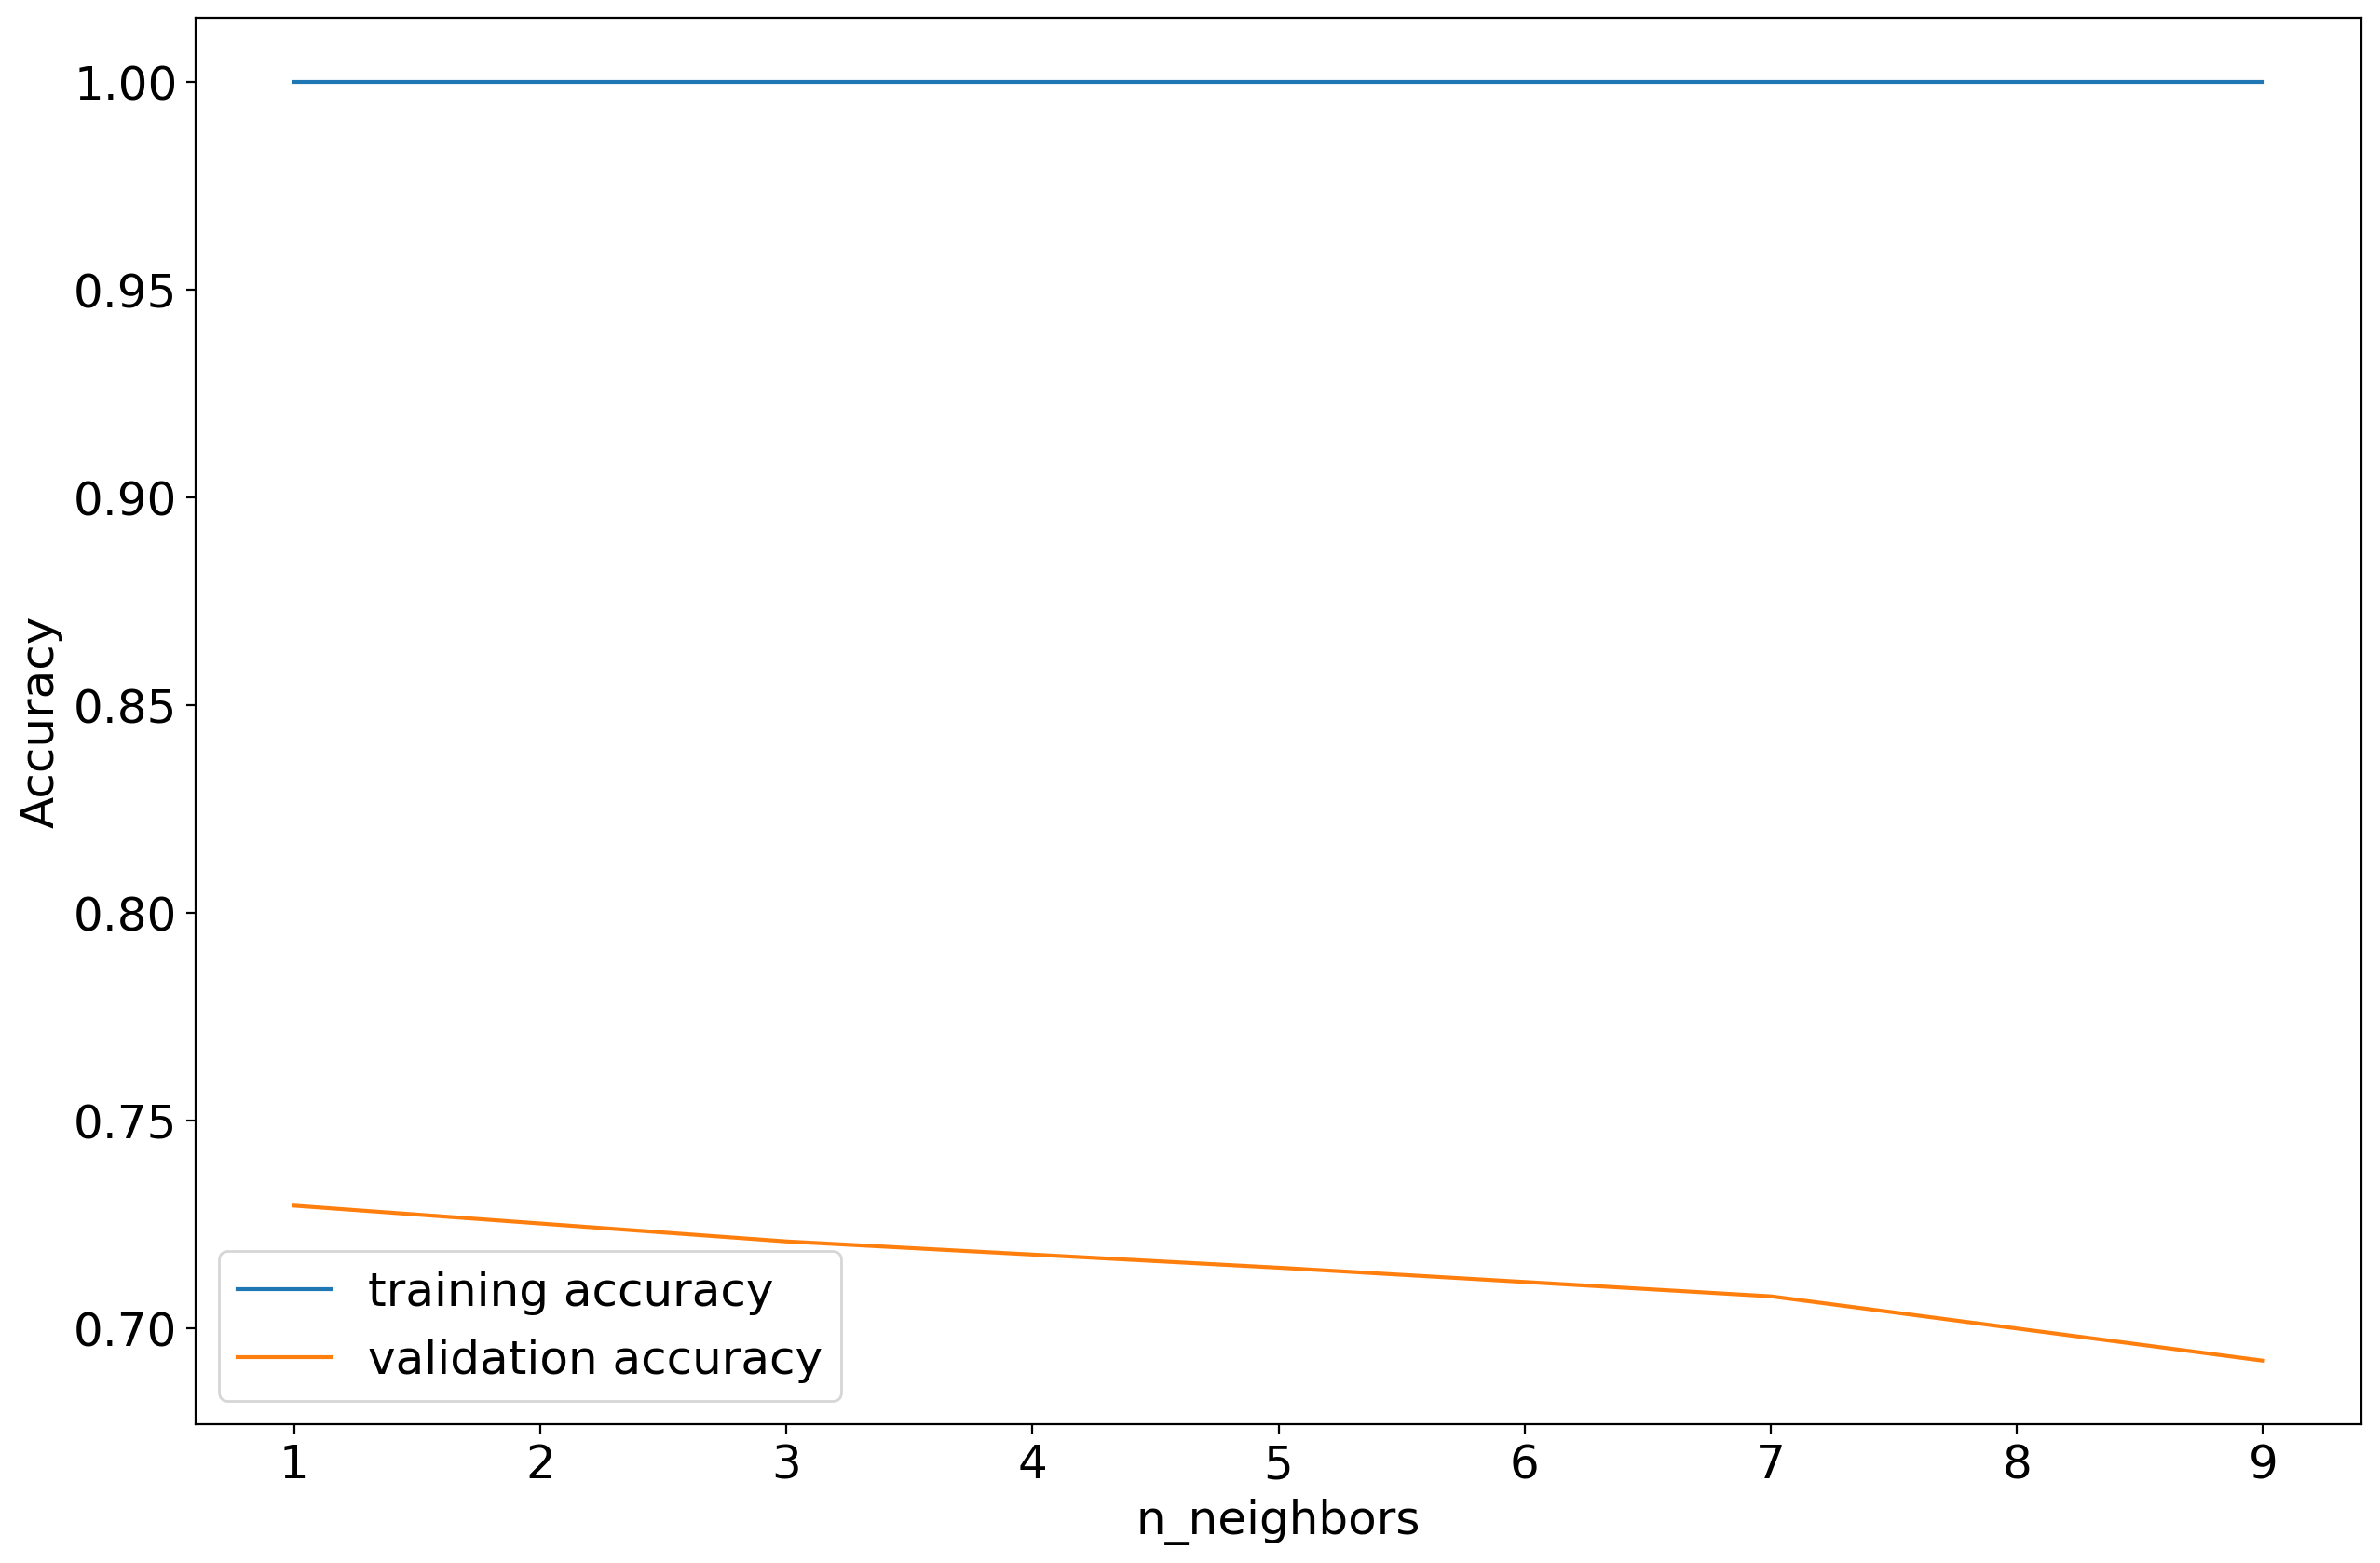

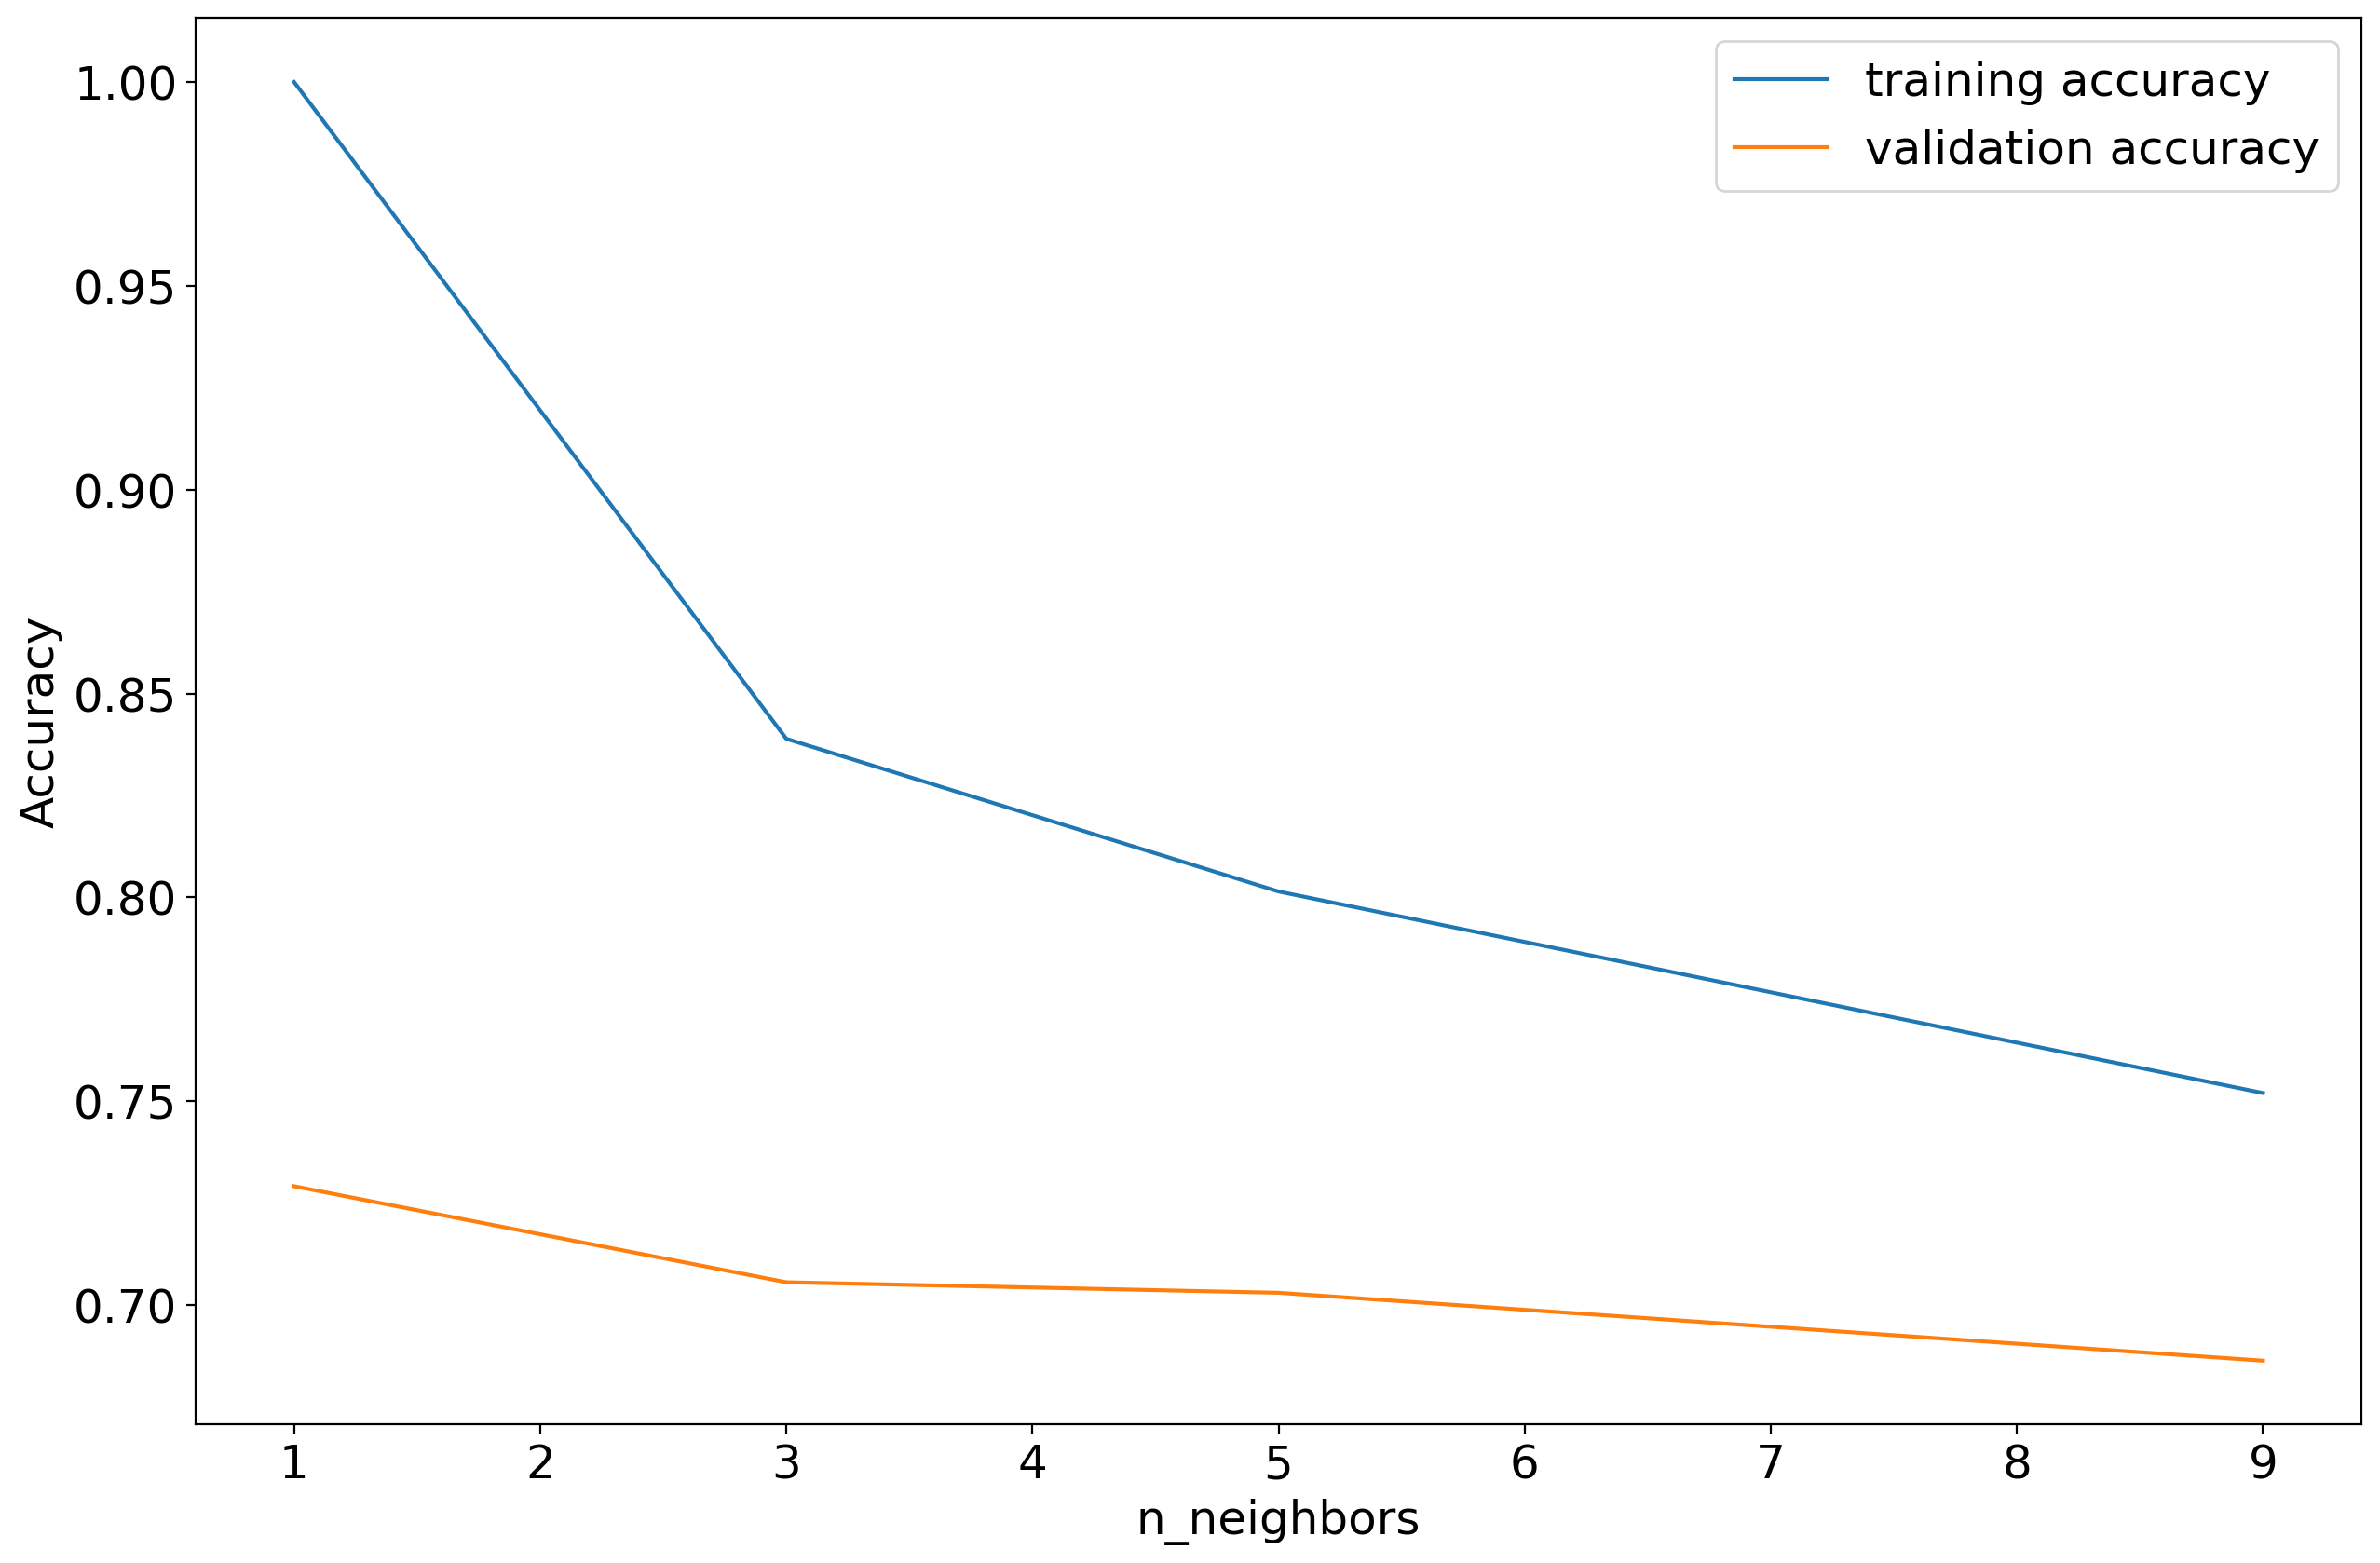

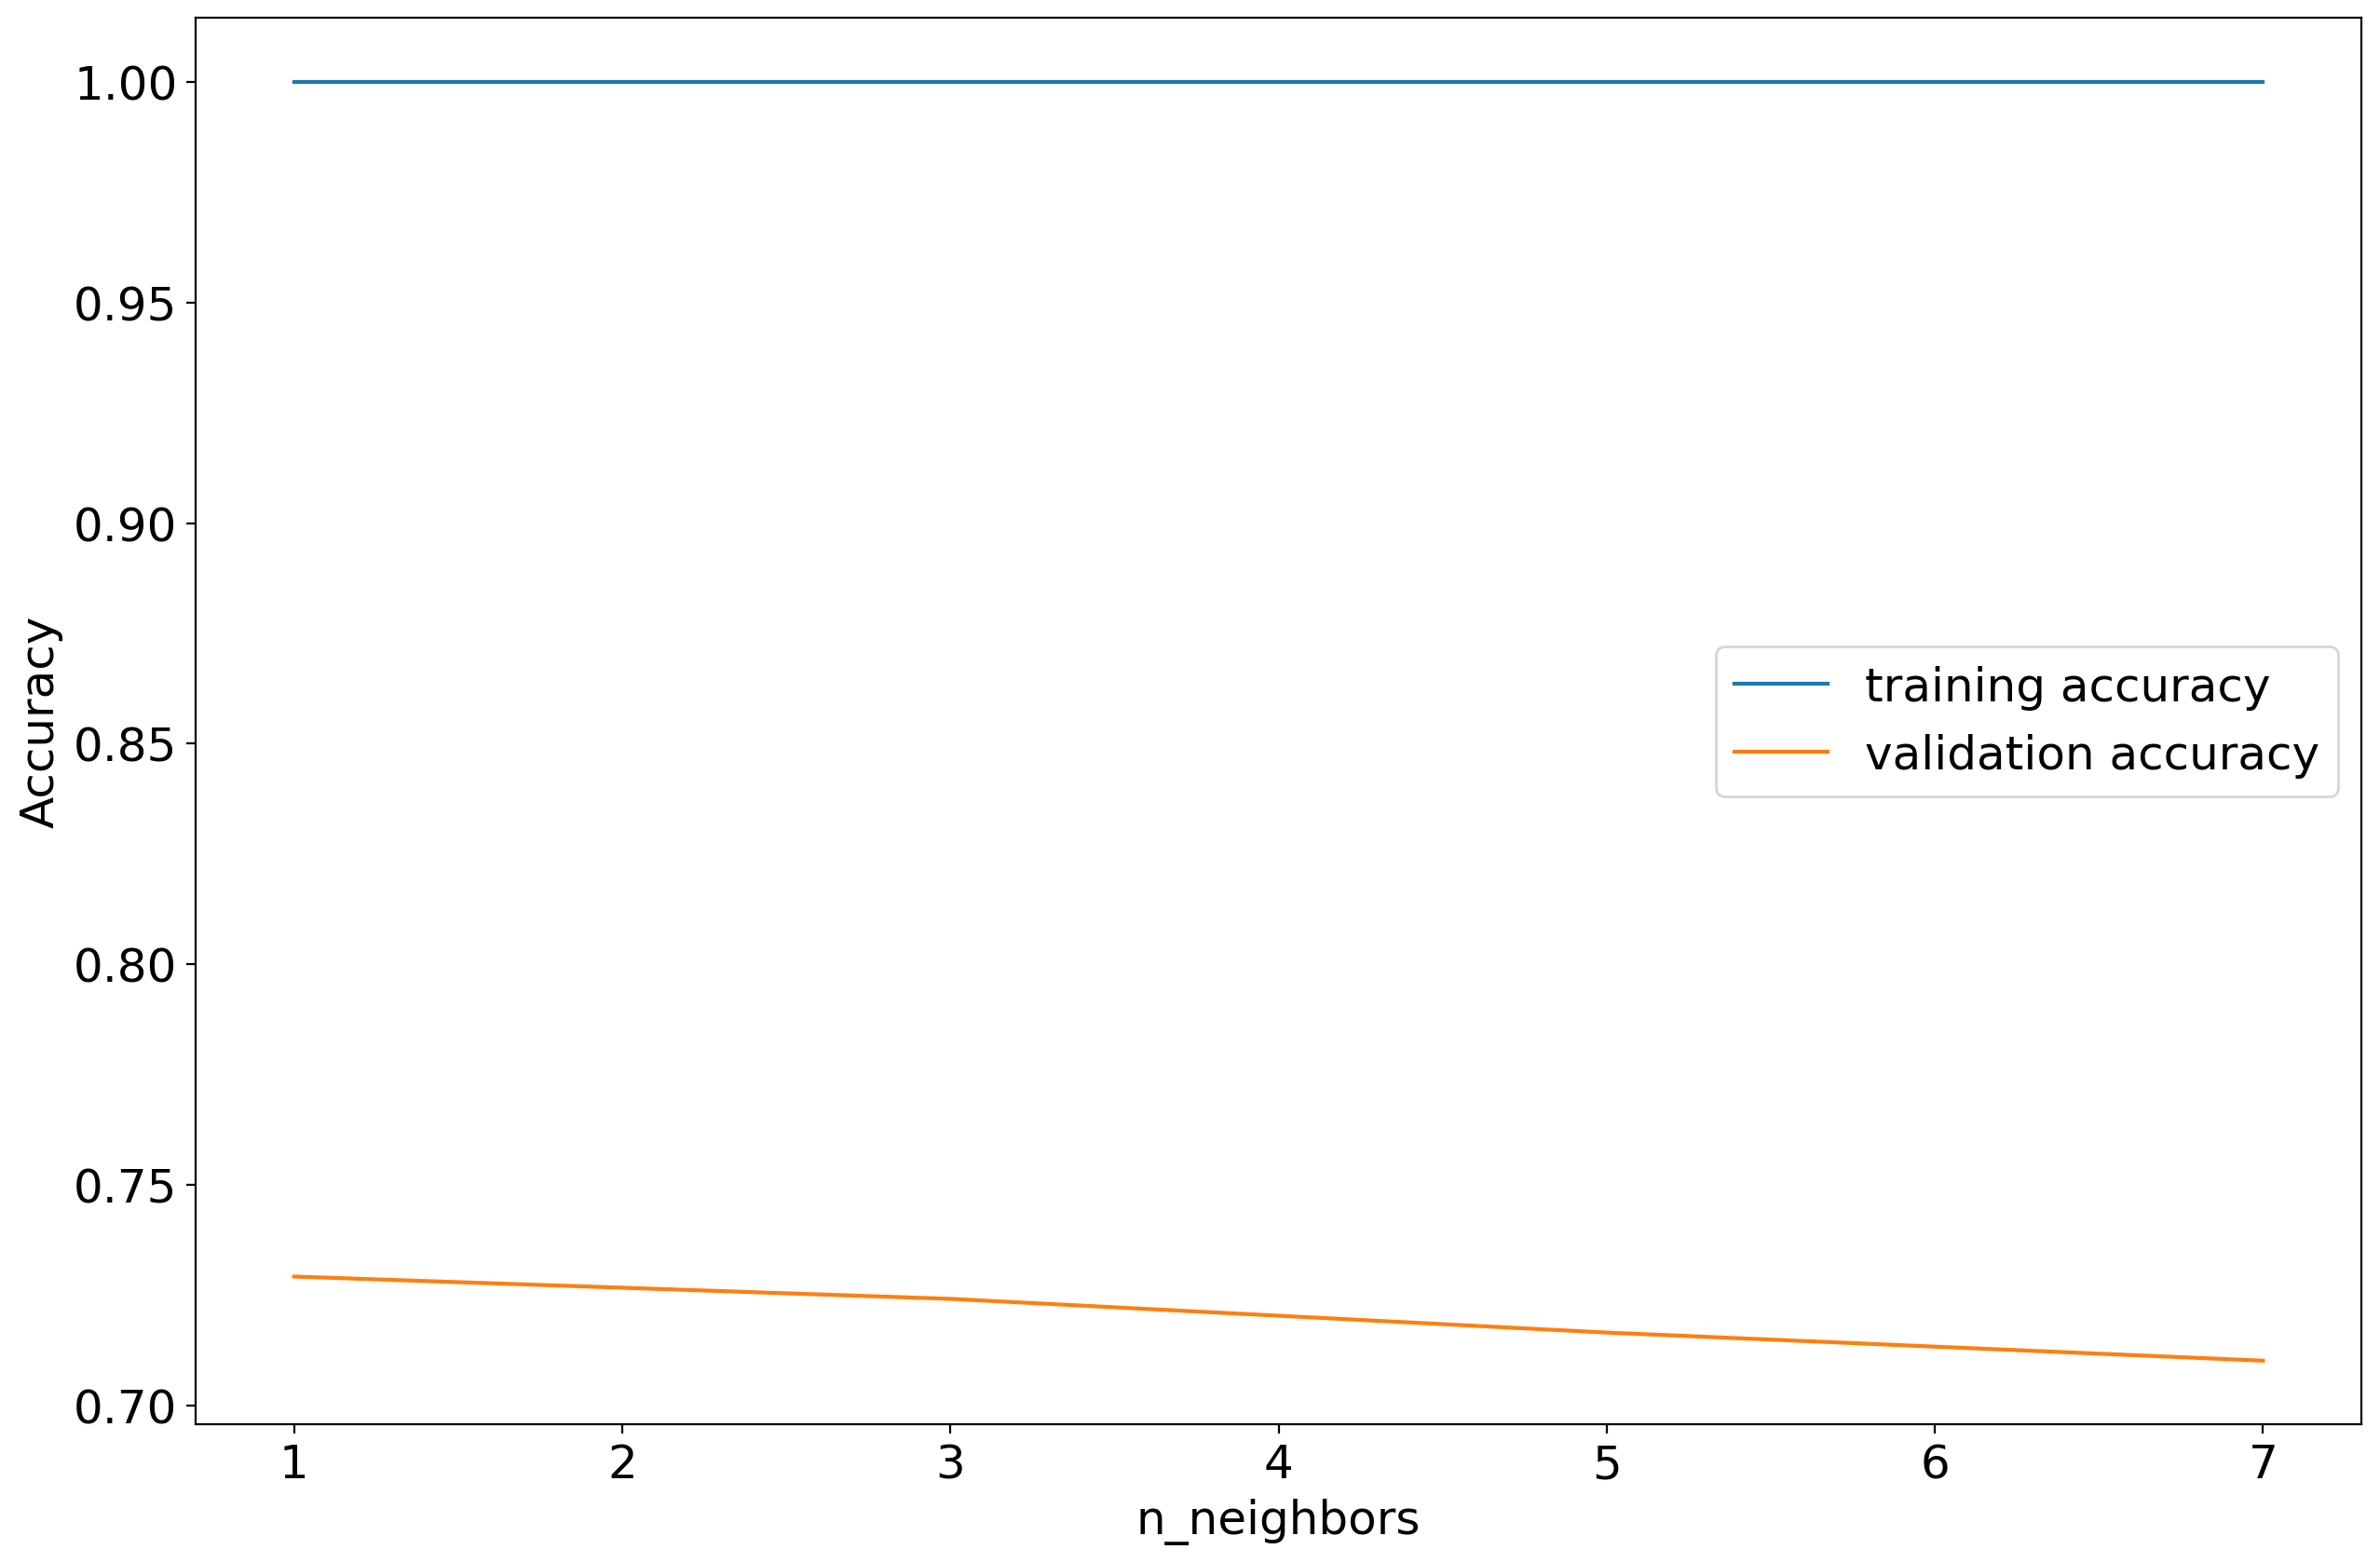

In [22]:
# graphs for knn results WITHOUT CV

neighbors_settings = [1, 3, 5, 7, 9]
training_accuracy = [1, 1, 1, 1, 1]
validation_accuracy = [0.7294658242389431, 0.7208500861573808, 0.7145318782309018, 0.7076392877656519, 0.6921309592188397]

plt.figure(figsize=(15,10), dpi=200)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# graphs for knn results WITH CV

# uniform

one_val = np.array([0.7292313 , 0.72492244, 0.73319545])
one_train = np.array([1., 1., 1.])

three_val = np.array([0.70372285, 0.70199931, 0.71096174])
three_train = np.array([0.83617718, 0.8398828 , 0.84057222])

five_val = np.array([0.70699759, 0.69786281, 0.70406756])
five_train = np.array([0.79877628, 0.80317132, 0.80230955])

nine_val = np.array([0.6918304 , 0.68304033, 0.68407446]) 
nine_train = np.array([0.74991382, 0.7518959 , 0.7541365])

neighbors_settings = [1, 3, 5, 9]
training_accuracy = [np.mean(one_train), np.mean(three_train), np.mean(five_train), np.mean(nine_train)]
validation_accuracy = [np.mean(one_val), np.mean(three_val), np.mean(five_val), np.mean(nine_val)]

plt.figure(figsize=(15,10), dpi=200)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# distance

one_val = np.array([0.73836608, 0.71871768, 0.73043778])
one_train = np.array([1., 1., 1.])

three_val = np.array([0.73009307, 0.71492589, 0.7273354 ]) 
three_train = np.array([1., 1., 1.])

five_val = np.array([0.71578766, 0.70923819, 0.72440538])
five_train = np.array([1., 1., 1.])

seven_val = np.array([0.71199586, 0.70268873, 0.71561531]) 
seven_train = np.array([1., 1., 1.])

neighbors_settings = [1, 3, 5, 7]
training_accuracy = [np.mean(one_train), np.mean(three_train), np.mean(five_train), np.mean(seven_train)]
validation_accuracy = [np.mean(one_val), np.mean(three_val), np.mean(five_val), np.mean(seven_val)]

plt.figure(figsize=(15,10), dpi=200)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

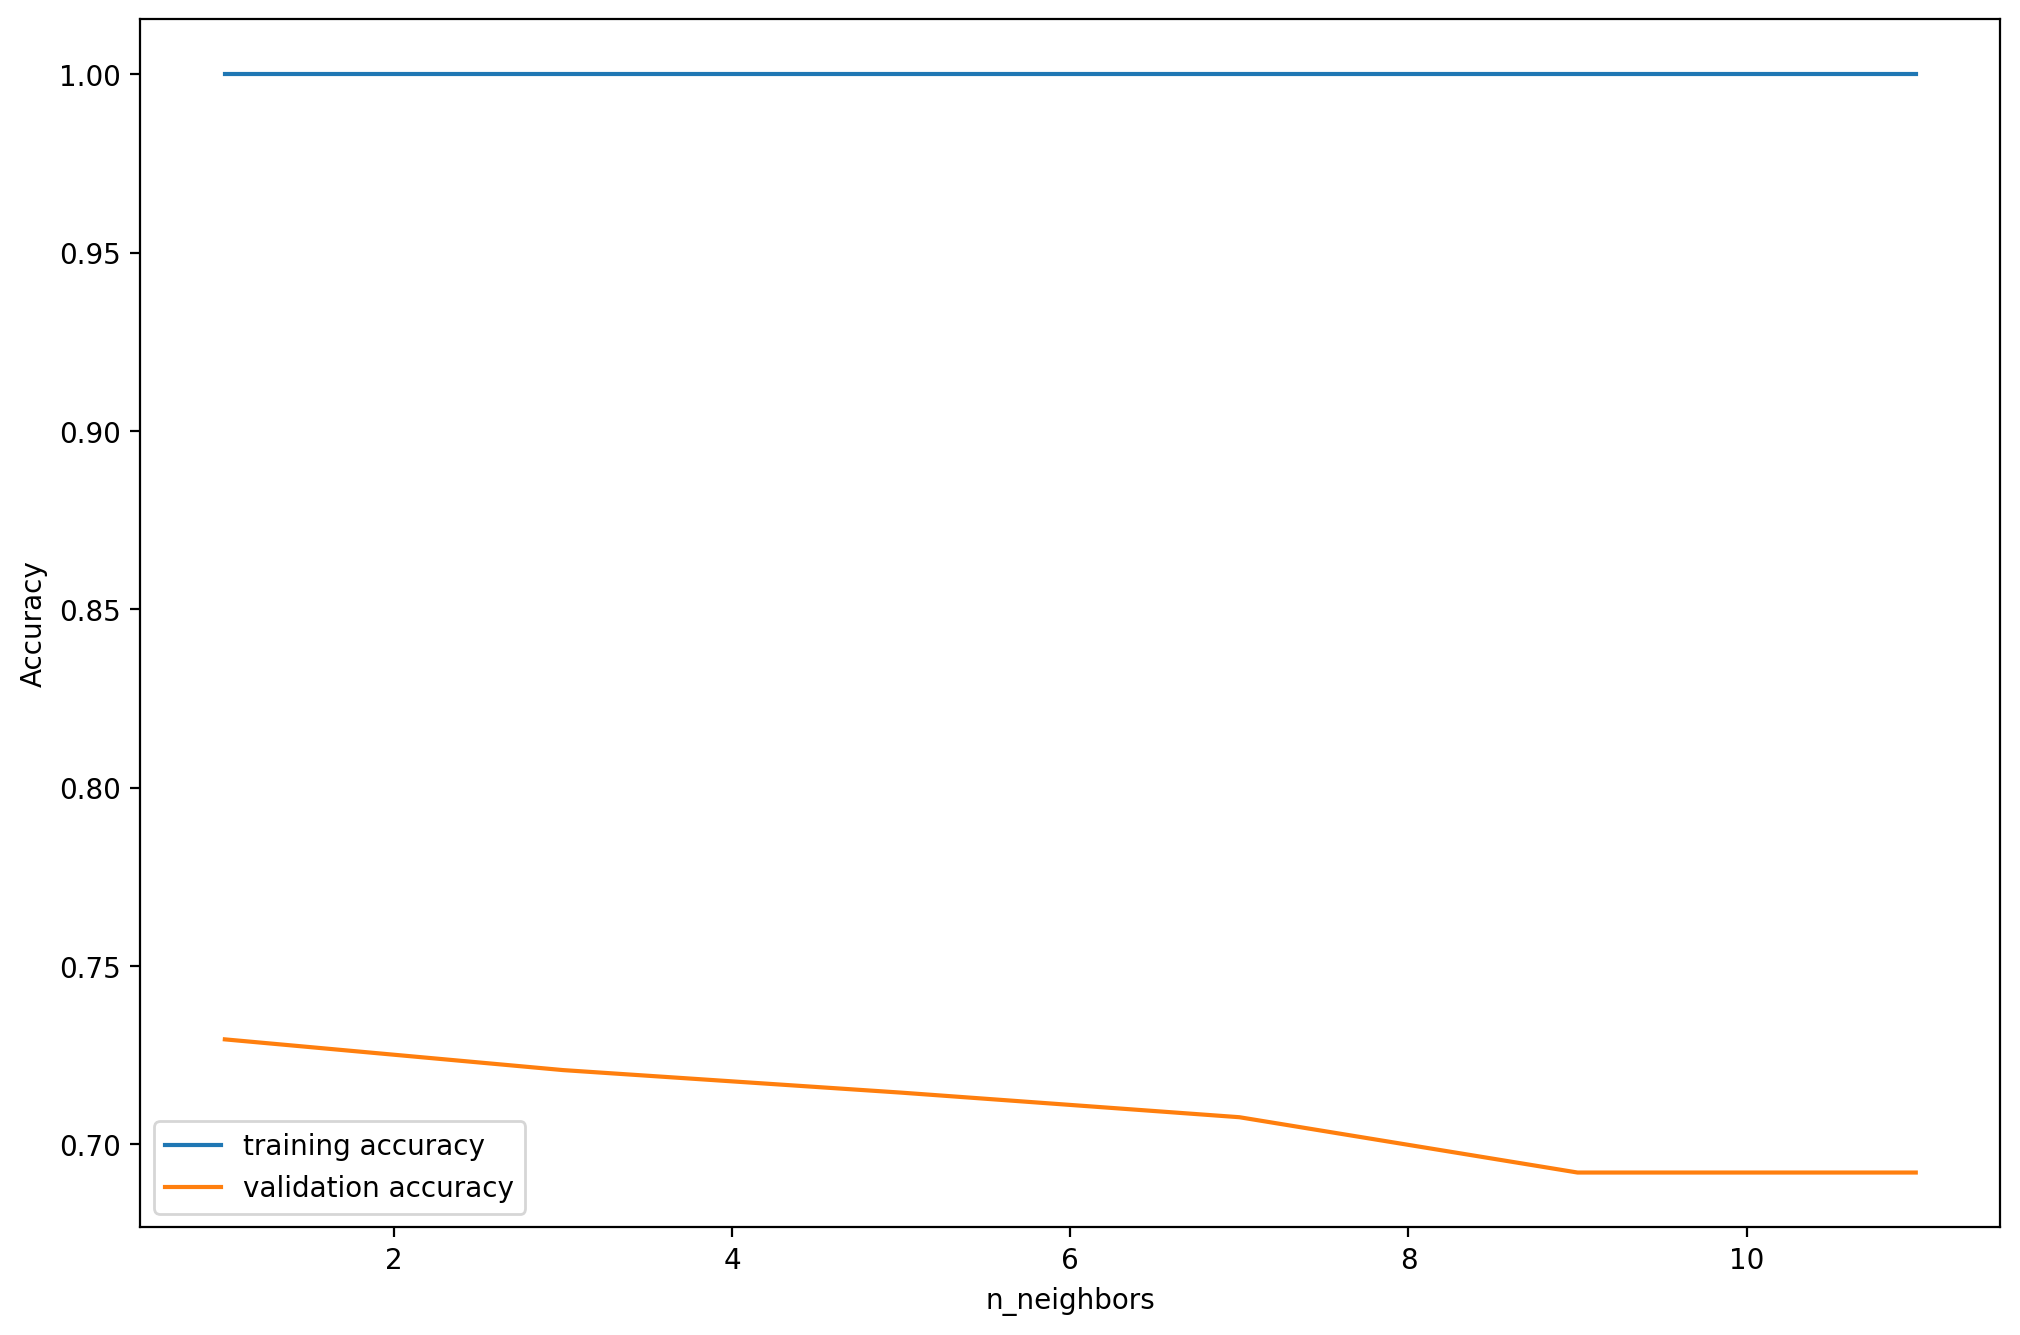

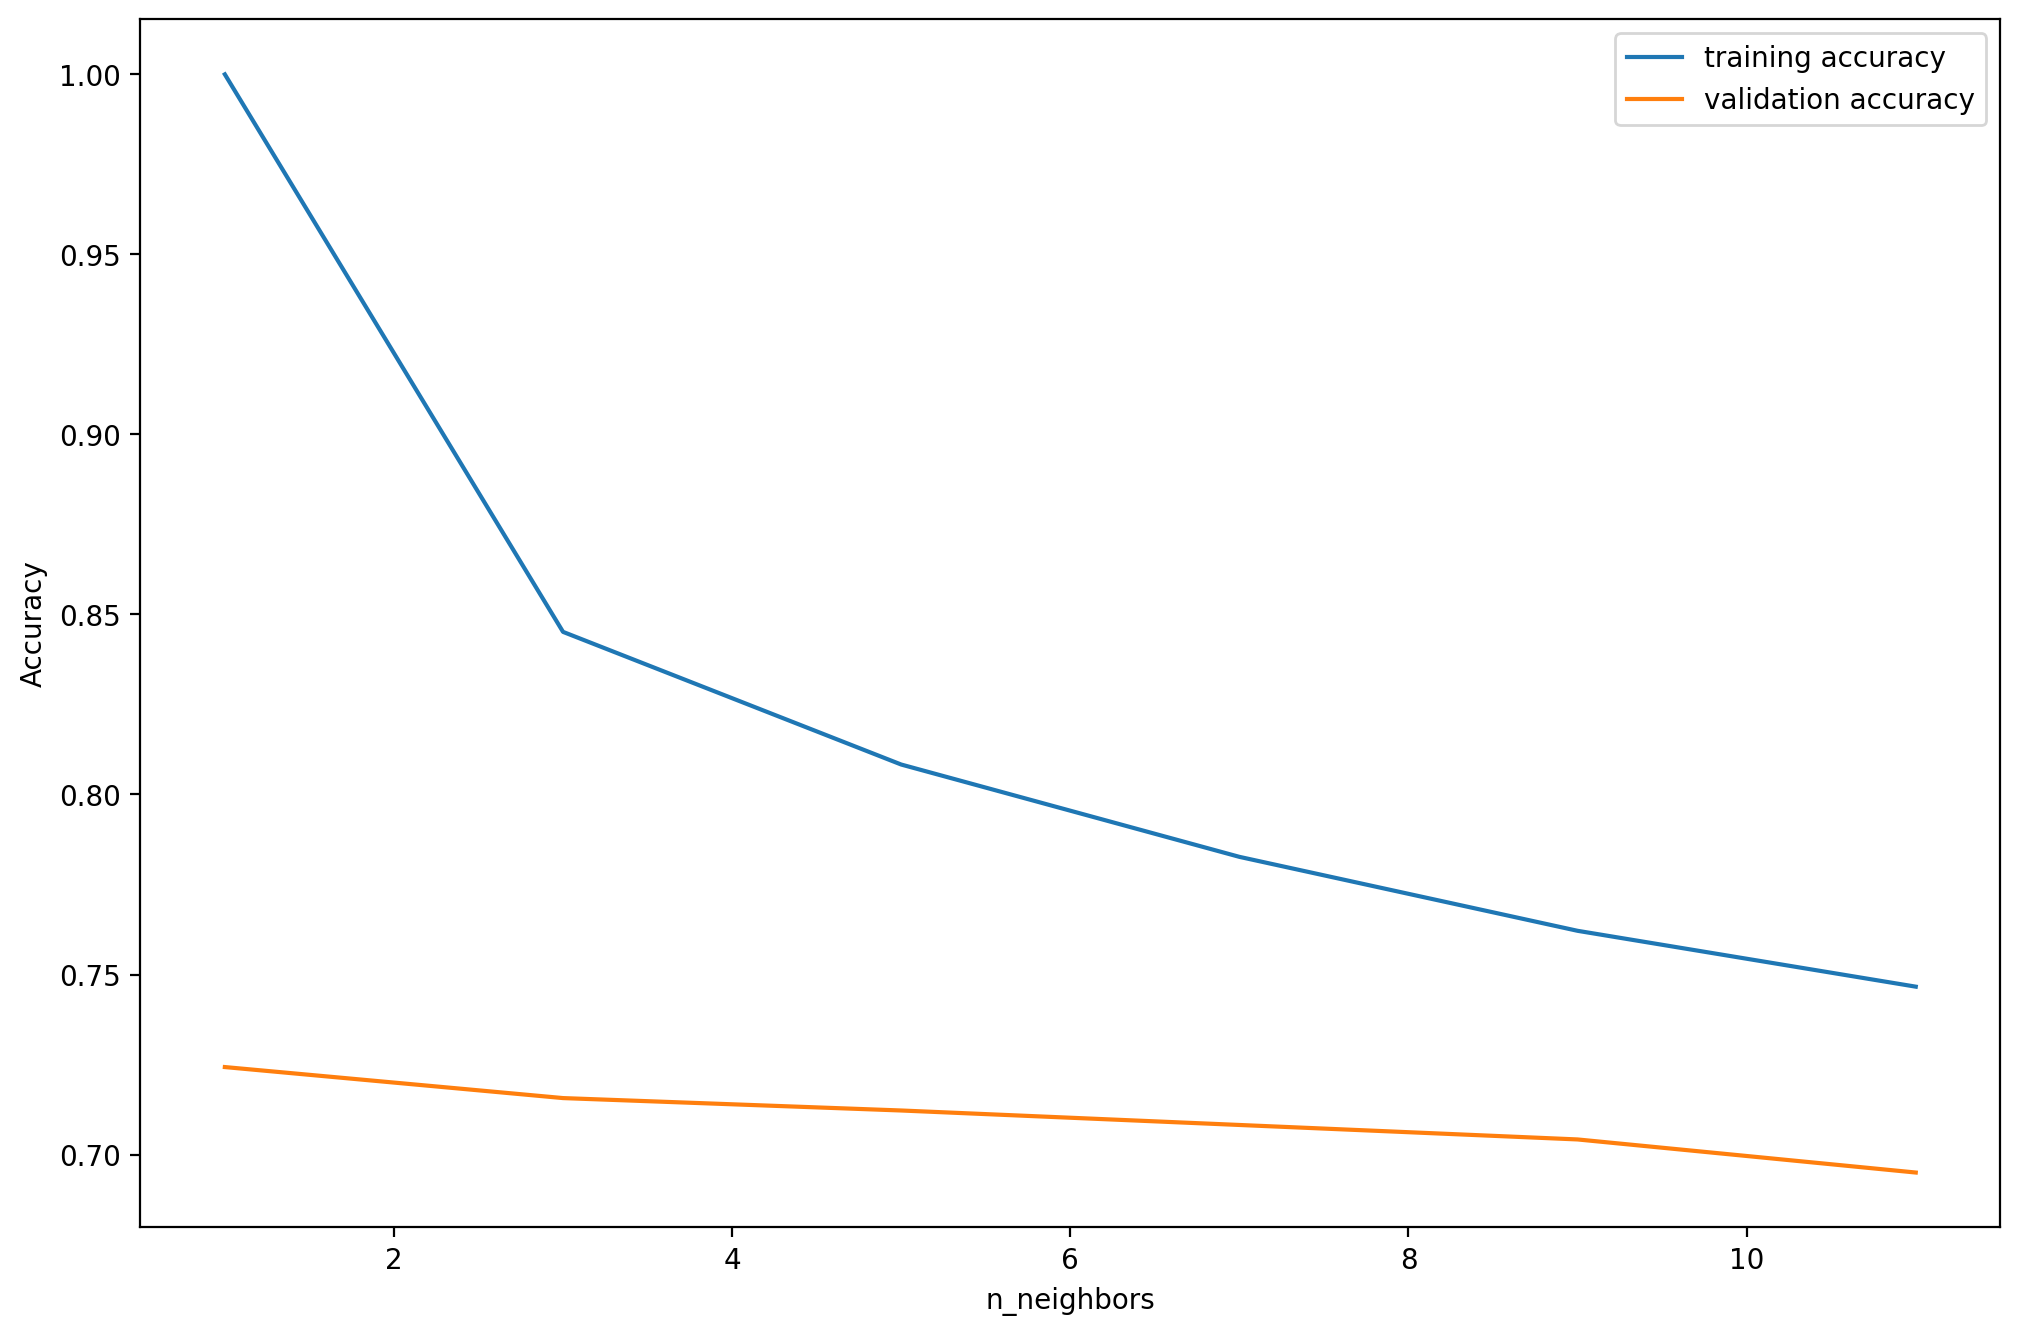

In [10]:
# all results in a graph

# KNN without CV, distance
neighbors_settings_knn_dis = [1, 3, 5, 7, 9, 11]
training_accuracy_knn_dis = [1, 1, 1, 1, 1, 1]
validation_accuracy_knn_dis = [0.7294658242389431, 0.7208500861573808, 0.7145318782309018, 0.7076392877656519, 0.6921309592188397, 0.6921309592188397]

plt.figure(figsize=(12,8), dpi=200)
plt.plot(neighbors_settings_knn_dis, training_accuracy_knn_dis, label="training accuracy")
plt.plot(neighbors_settings_knn_dis, validation_accuracy_knn_dis, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_distance.png")
plt.show()

# KNN without CV, distance
neighbors_settings_knn_uni = [1, 3, 5, 7, 9, 11]
training_accuracy_knn_uni = [1.0, 0.8451594369434071, 0.808316575696639, 0.7826773915541511, 0.7621373168629704, 0.7466245331801207]
validation_accuracy_knn_uni = [0.7242963813900057, 0.7156806433084434, 0.7122343480758185, 0.7082136703044227, 0.704192992533027, 0.6950028719126938]

plt.figure(figsize=(12,8), dpi=200)
plt.plot(neighbors_settings_knn_uni, training_accuracy_knn_uni, label="training accuracy")
plt.plot(neighbors_settings_knn_uni, validation_accuracy_knn_uni, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_uniform.png")
plt.show()

#### Logistic Regression with Cross-validation

In [ ]:
"""
from sklearn.linear_model import LogisticRegression

C_values = [0.01, 1, 100]
val_scores = []

for C_value in C_values:
    fp = open("CV_scores_LogReg.txt", "a")
    logreg = LogisticRegression(C = C_value, max_iter = 2000, n_jobs = 3, multi_class='multinomial', solver='lbfgs', penalty = 'l2')
    logreg.fit(X_train, y_train.ravel())
    train_score = logreg.score(X_train, y_train.ravel())
    val_score = logreg.score(X_val, y_val.ravel())
    val_scores.append(val_score)
    fp.write(f"C = {C_value}:\n")
    fp.write(f"Training score = {train_score}\n")
    fp.write(f"Validation score = {val_score}\n")
    np.save(f"Coefficients {C_value}.npy", logreg.coef_)
    np.save(f"Intercept {C_value}.npy", logreg.intercept_)

fp.write(f"Test score for C = {C_values[np.argmax(val_scores)]}: {logreg.score(X_test, y_test)}")
fp.close()
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e77155c-109f-4e2d-ae2d-a36577879d44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>